https://fr.wikipedia.org/wiki/G%C3%A9n%C3%A9rateur_de_nombres_pseudo-al%C3%A9atoires

In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf

# Fonction de base

In [146]:
np.mod(5,3)

2

In [147]:
np.random.seed(123)
np.random.random()

0.6964691855978616

In [148]:
np.random.seed(0)
rl = []
for i in range(100):
    rl.append(np.random.random())

In [149]:
np.sum(rl)

47.279383951251766

# Fonction pseudo-aléatoire

Méthode de Fibonacci
Cette méthode est basée sur la suite de Fibonacci modulo la valeur maximale désirée :
${\displaystyle x_{n}=(x_{n-1}+x_{n-2})\mod M}x_n = (x_{n-1} + x_{n-2}) \mod M$  avec x0 et x1 en entrée.
On peut employer une variante :
${\displaystyle x_{n}=(x_{n-1}+x_{n-k})\mod M}x_n = (x_{n-1} + x_{n-k}) \mod M$  avec x0,...,xk –1 en entrée.
La qualité du générateur dépend de k et des nombres utilisés pour initialiser la suite. Ce générateur est par contre très simple à implémenter et ne consomme que peu de ressources.

In [150]:
class GeneratorFibonacciSimple:
    """
    Pseudo-random number generator based on the Fubonaci sequence.
    
    
    
    """
    
    def __init__(self, M, x_0, x_1):
        self.M = M
        self.x_n_0 = x_0
        self.x_n_1 = x_1
        
    def generator(self):
        while True:
            self.x_tmp = self.x_n_0
            self.x_n_0 = self.x_n_1
            self.x_n_1 = np.mod(self.x_tmp + self.x_n_0, self.M)
            yield self.x_n_1

In [196]:
M = 2**16 - 1
x_0 = 1
x_1 = M / 2
rang = 100

random = GeneratorFibonacciSimple(M, x_0, x_1)
assert next(random.generator()) <= M

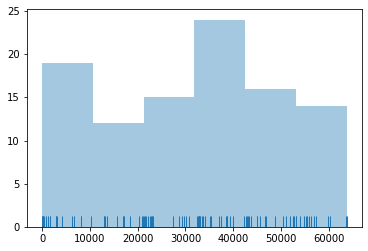

In [197]:
X = []
for i in range(rang):
    x = next(random.generator())
    X.append(x)
    
sns.distplot(X, kde=False, rug=True)

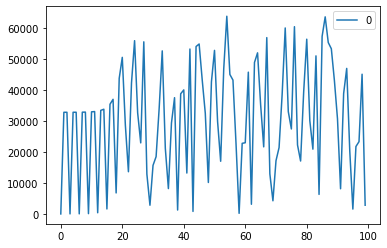

In [198]:
sns.lineplot(data=pd.DataFrame(X))

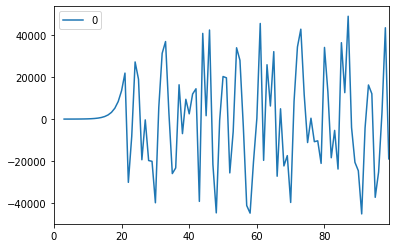

In [199]:
differenced = pd.DataFrame(X).diff(3)
differenced.plot()

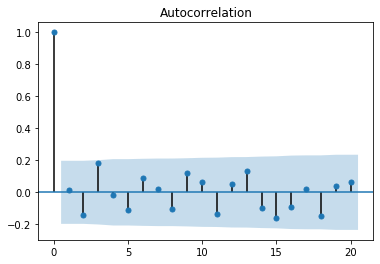

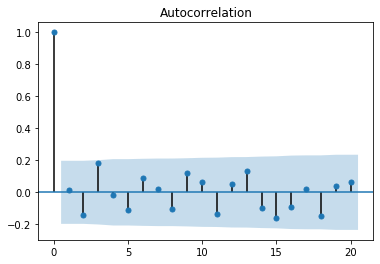

In [200]:
plot_acf(np.array(X[1:]))

Text(0, 0.5, 'partie imaginaire')

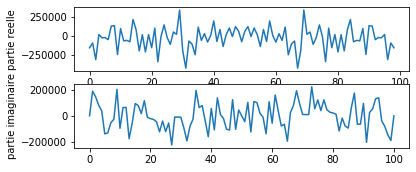

In [201]:
A = np.fft.fft(X)
B = np.append(A, A[0])
plt.subplot(312)
plt.plot(np.real(B[1:-1]))
plt.ylabel("partie reelle")

plt.subplot(313)
plt.plot(np.imag(B))
plt.ylabel("partie imaginaire")

In [202]:
class GeneratorFibonacciComplexe:
    """
    Pseudo-random number generator based on the Fubonaci sequence.
    
    
    
    """
    
    def __init__(self, M, X):
        self.M = M
        self.Multi = X[:-1]
        self.X = [M for i in range(len(X))] 
        
    def generator(self):
        while True:
            self.x_tmp = self.X[0]
            self.X = self.X[1:]
            self.X.append(np.mod(self.x_tmp + np.sum(np.array(self.X) * np.array(self.Multi).T), self.M))
            yield self.X[-1]

array([0.05882353, 0.5       , 0.33333333, 0.05263158, 0.07692308,
       0.09090909, 0.2       , 0.14285714, 1.        ])

In [232]:
random = GeneratorFibonacciComplexe(M, np.random.permutation([1, 1/2, 1/3, 1/5, 1/7, 1/11, 1/13, 1/17, 1/19]))
assert next(random.generator()) <= M

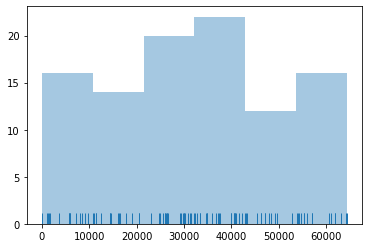

In [233]:
X = []
for i in range(rang):
    x = next(random.generator())
    X.append(x)
    
sns.distplot(X, kde=False, rug=True)

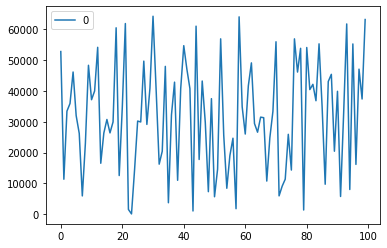

In [234]:
sns.lineplot(data=pd.DataFrame(X))

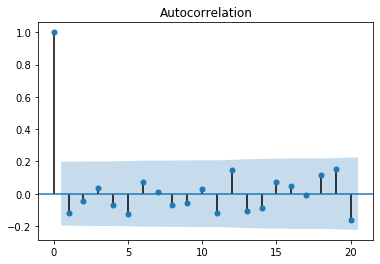

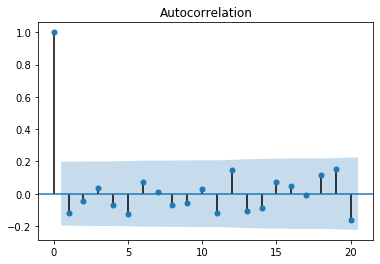

In [235]:
plot_acf(np.array(X[1:]))

Text(0, 0.5, 'partie imaginaire')

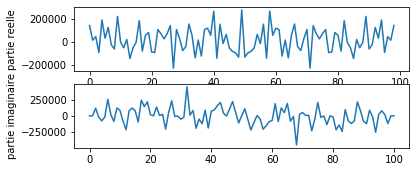

In [236]:
A = np.fft.fft(X)
B = np.append(A, A[0])
plt.subplot(312)
plt.plot(np.real(B[1:-1]))
plt.ylabel("partie reelle")

plt.subplot(313)
plt.plot(np.imag(B))
plt.ylabel("partie imaginaire")

In [237]:
np.array([M,M,M,M,M,M,M,M]) * np.array([1/2, 1/3, 1/5, 1/7, 1/11, 1/13, 1/17, 1/19]).T

array([32767.5       , 21845.        , 13107.        ,  9362.14285714,
        5957.72727273,  5041.15384615,  3855.        ,  3449.21052632])